In [1]:
import pandas as pd
import plotly.express as px
from pathlib import Path

In [2]:
# Set general path
cwd = Path.cwd()

In [3]:
vax_data_path = cwd.parent.parent / Path("data/vaccination-data/vaccinations_OWID.csv")
data = pd.read_csv(vax_data_path)

In [4]:
data

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195233,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,NaN,2076.0,74.87,39.44,29.11,6.33,127.0,638.0,0.004
195234,Zimbabwe,ZWE,2022-10-06,NaN,NaN,NaN,NaN,NaN,1714.0,NaN,NaN,NaN,NaN,105.0,563.0,0.003
195235,Zimbabwe,ZWE,2022-10-07,NaN,NaN,NaN,NaN,NaN,1529.0,NaN,NaN,NaN,NaN,94.0,462.0,0.003
195236,Zimbabwe,ZWE,2022-10-08,NaN,NaN,NaN,NaN,NaN,1344.0,NaN,NaN,NaN,NaN,82.0,361.0,0.002


In [67]:
# select countries
countries = ['Malaysia','Philippines','Vietnam']

vax_df = data.loc[data['location'].isin(countries)]
vax_df = vax_df[['location', 'date', 'people_fully_vaccinated_per_hundred']]

In [84]:
vax_df_phl = vax_df.loc[vax_df['location'] == 'Philippines']
vax_df_phl = vax_df_phl[['date', 'people_fully_vaccinated_per_hundred']]
vax_df_phl = vax_df_phl.set_index(vax_df_phl['date'])
vax_df_phl = vax_df_phl.interpolate()
vax_df_phl = vax_df_phl.drop(columns=['date'])
vax_df_phl['location'] = 'Philippines'

C:\Users\ehug0006\AppData\Local\Temp\ipykernel_26340\2473785463.py:4: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [85]:
vax_df_vnm = vax_df.loc[vax_df['location'] == 'Vietnam']
vax_df_vnm = vax_df_vnm[['date', 'people_fully_vaccinated_per_hundred']]
vax_df_vnm = vax_df_vnm.set_index(vax_df_vnm['date'])
vax_df_vnm = vax_df_vnm.interpolate()
vax_df_vnm = vax_df_vnm.drop(columns=['date'])
vax_df_vnm['location'] = 'Vietnam'

C:\Users\ehug0006\AppData\Local\Temp\ipykernel_26340\1330562604.py:4: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [86]:
vax_df_mys = vax_df.loc[vax_df['location'] == 'Malaysia']
vax_df_mys = vax_df_mys.set_index(vax_df_mys['date'])
vax_df_mys = vax_df_mys.drop(columns=['date'])

In [87]:
vax_df_final = pd.concat([vax_df_phl, vax_df_vnm, vax_df_mys])

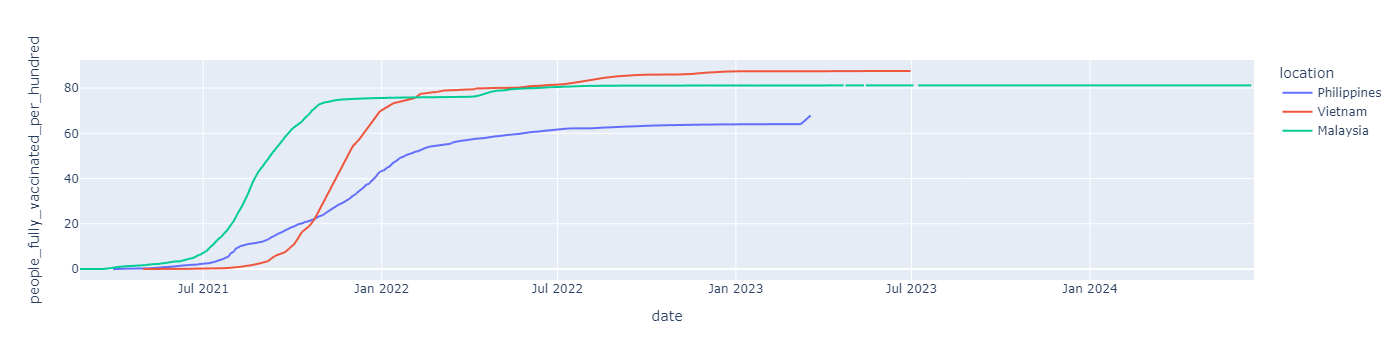

In [89]:
fig = px.line(vax_df_final, x=vax_df_final.index, y='people_fully_vaccinated_per_hundred', color='location')

fig.show()

In [91]:
# save dataframe to csv
save_path = cwd.parent.parent / Path("data/vaccination-data/vaccination_data.csv")

# save outputs
vax_df_final.to_csv(save_path, index = True)